# Data Analysis Script for Risk Preferences


In [56]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [57]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Analyzing Questionnaire Data

In [58]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')
raw_census = pd.read_csv('CensusData.csv')

raw_questionnaire

,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_2,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,2,0,1,0,3,0,1,2,2
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,7,0,1,0,3,0,2,2,2
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,2,2,0,1,0,3,0,2,2,3
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,1,1,0,1,0,3,0,2,2,2
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,2,0,1,0,3,0,2,3,3
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,2,5,0,1,0,3,0,2,2,2
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,1,0,1,0,3,0,2,3,2


In [59]:
#Collapsing Census Data by hh, to extract one caste identity per hh
grouped_census = raw_census.groupby('HHID').first()

raw_data = pd.merge(raw_questionnaire, grouped_census, on='HHID')
raw_data

,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,M_Status,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,0,3,PII,4,0,0,-1,0,-1,1
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,3,0,5,1,0,-1,N67,2059-01,1
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,0,0,6,0,0,-1,0,-1,3
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,1,0,0,5,0,0,-1,0,-1,1
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,0,12,0,2,0,0,-1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,0,0,0,0,0,0,-1,0,-1,6
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,0,0,5,0,0,-1,N78,2026,6
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,1,0,0,5,1,0,-1,F091,2052,3
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,0,0,5,1,0,-1,N56,2041-01,3


# General Risk Preferences (B2)

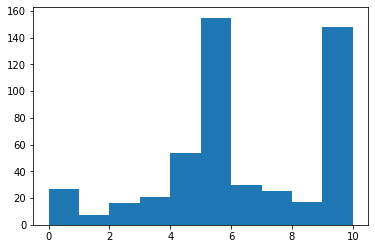

In [60]:
riskpref = pd.DataFrame()
riskpref[['HHID', 'Gender','Age','Caste','RiskPref']] = raw_data[['HHID','Resp1_Gen', 'Resp1_Age', 'Caste', 'B2']]

plt.hist(riskpref['RiskPref'])

plt.show()



In [61]:
#Creating Binary Logical Value for whether someone is risk seeking (riskpref > 5)
riskpref['RiskSeek'] = riskpref['RiskPref'] > 5


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4163/3087470387.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Male','','','','Female'], fontsize=18)


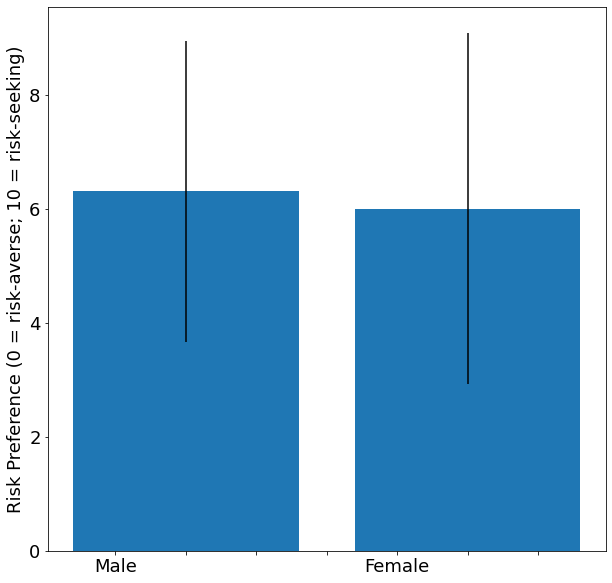

In [62]:
#Bar Graph of Risk Preferences by Gender

malepref = np.average(riskpref.loc[riskpref['Gender'] == 0]['RiskPref'])
malestd = np.std(riskpref.loc[riskpref['Gender'] == 0]['RiskPref'])
femalepref = np.average(riskpref.loc[riskpref['Gender'] == 1]['RiskPref'])
femalestd = np.std(riskpref.loc[riskpref['Gender'] == 1]['RiskPref'])

genderpref = [malepref, femalepref]

# Figure Size
f, ax = plt.subplots(figsize =(10, 10))
xpos = [0,1]


ax.bar(xpos, genderpref, yerr = [malestd, femalestd])

ax.set_ylabel('Risk Preference (0 = risk-averse; 10 = risk-seeking)', fontsize=18)
ax.set_xticklabels(['','Male','','','','Female'], fontsize=18)


plt.yticks(fontsize=18)

plt.show()

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4163/968595154.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','18-34', '35-44', '45-54','55-64','65+'], fontsize=18)


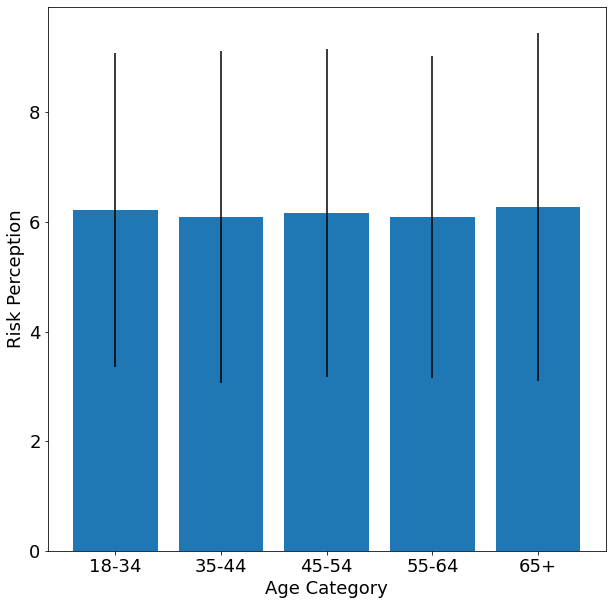

In [63]:
#Bar Graph of Risk Preferences by Age

agecutoffs = [35, 45, 55, 65] #Cutoffs used in Nepali Census to delimit age categories
agecats = len(agecutoffs) + 1
ageprefs = np.zeros(agecats)
agestd = np.zeros(agecats)

for i in range(agecats):
    if i < (agecats - 1):
        ageprefs[i] = np.average(riskpref.loc[riskpref['Age'] < agecutoffs[i]]['RiskPref'])
        agestd[i] = np.std(riskpref.loc[riskpref['Age'] < agecutoffs[i]]['RiskPref'])
    else:
        ageprefs[i] = np.average(riskpref.loc[riskpref['Age'] > agecutoffs[i-1]]['RiskPref'])
        agestd[i] = np.std(riskpref.loc[riskpref['Age'] > agecutoffs[i-1]]['RiskPref'])
    
    
    
xpos = np.arange(0,agecats, 1)

f, ax = plt.subplots(figsize=[10,10])

ax.bar(xpos, ageprefs, yerr=agestd)
ax.set_xticklabels(['','18-34', '35-44', '45-54','55-64','65+'], fontsize=18)
ax.set_xlabel('Age Category', fontsize=18)
ax.set_ylabel('Risk Perception', fontsize=18)

plt.yticks(size=18)
plt.show()

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4163/2204937554.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Brahmin/Chetri', 'Gurung', 'Dalit','Newar','Tharu', 'Other'], fontsize=18, rotation=45)


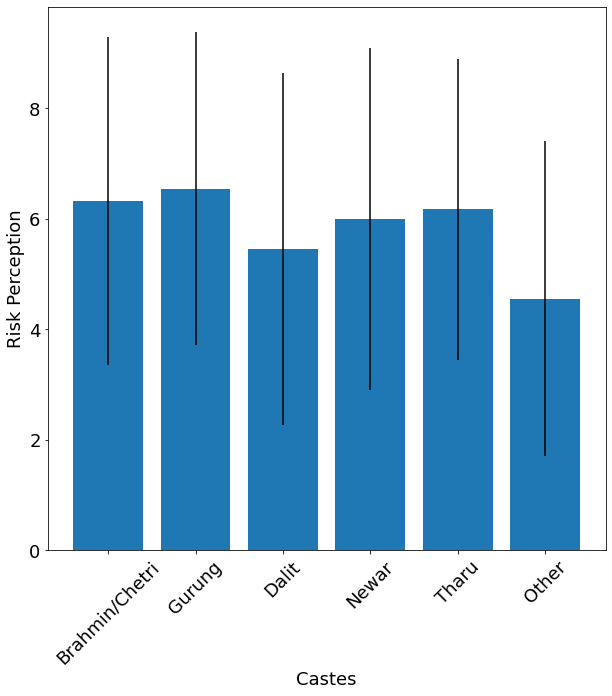

In [64]:
#Plotting Risk Preferences by Caste
castes = int(np.max(riskpref['Caste']))
casteprefs = np.zeros(castes)
castestd = np.zeros(castes)

for i in range(castes):
    casteprefs[i] = np.average(riskpref.loc[riskpref['Caste'] == (i+1)]['RiskPref'])
    castestd[i] = np.std(riskpref.loc[riskpref['Caste'] == (i+1)]['RiskPref'])

    
xpos = np.arange(0,castes, 1)

f, ax = plt.subplots(figsize=[10,10])

ax.bar(xpos, casteprefs, yerr=castestd)
ax.set_xticklabels(['','Brahmin/Chetri', 'Gurung', 'Dalit','Newar','Tharu', 'Other'], fontsize=18, rotation=45)
ax.set_xlabel('Castes', fontsize=18)
ax.set_ylabel('Risk Perception', fontsize=18)

plt.yticks(size=18)
plt.show()

In [65]:
#Saving riskpref dataframe to CSV

riskpref.to_csv('RiskPreferences.csv')

# Analyzing Adaptation Choices and Risk Preferences

In [18]:
#Reading in Adaptation Strategies
adapt = pd.read_csv('AdaptationStrategies.csv')

#Merge Adaptation Strategies with Risk Preferences
risk_adapt = pd.merge(adapt, riskpref, on='HHID')
risk_adapt

,Unnamed: 0,HHID,DifferentSeed,DifferentCrop,DelayedPlanting,FewerCrops,BiggerLoan,BorrowMoney,Remittances,SoldLivestock,...,Migration,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies,Gender,Age,Caste,RiskPref
0,0,2301006,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,43,1,10
1,1,2301007,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,55,1,6
2,2,2301013,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,49,3,10
3,3,2301016,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,55,1,6
4,4,2301017,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,47,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2611114,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,47,6,5
496,496,2611115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,36,6,8
497,497,2611117,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,1,44,3,6
498,498,2611118,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,56,3,0


In [19]:
#Creating new binary risk pref of riskseek (1 = RiskPref> 5; 0 =RiskPref<5)

risk_adapt['RiskSeek'] = risk_adapt['RiskPref'] > 5

risk_adapt

,Unnamed: 0,HHID,DifferentSeed,DifferentCrop,DelayedPlanting,FewerCrops,BiggerLoan,BorrowMoney,Remittances,SoldLivestock,...,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies,Gender,Age,Caste,RiskPref,RiskSeek
0,0,2301006,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,43,1,10,True
1,1,2301007,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,55,1,6,True
2,2,2301013,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,49,3,10,True
3,3,2301016,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,55,1,6,True
4,4,2301017,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,47,1,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2611114,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,47,6,5,False
496,496,2611115,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,36,6,8,True
497,497,2611117,1,0,1,0,0,1,0,0,...,0,0,1,1,0,1,44,3,6,True
498,498,2611118,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,56,3,0,False


In [22]:
#Bar Plot separating out Adaptation Strategies by risk-seeking vs. non-risk-seeking
riskseek_adapt = {'FarmStrategies': 0, 'FinancialStrategies': 0, 'LivelihoodStrategies': 0}
riskaverse_adapt = {'FarmStrategies': 0, 'FinancialStrategies': 0, 'LivelihoodStrategies': 0}

for item in riskseek_adapt.keys():
    riskseek_adapt[item] = risk_adapt.loc[risk_adapt['RiskSeek'] == True][item].mean()
    riskaverse_adapt[item] = risk_adapt.loc[risk_adapt['RiskSeek'] == False][item].mean()



{'FarmStrategies': 0.8090909090909091, 'FinancialStrategies': 0.1590909090909091, 'LivelihoodStrategies': 0.19090909090909092}
{'FarmStrategies': 0.8357142857142857, 'FinancialStrategies': 0.13214285714285715, 'LivelihoodStrategies': 0.15714285714285714}


[0 1 2]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4163/4127867493.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Farm Strategies','','Financial Strategies','', 'Livelihood Strategies'], fontsize=18, rotation=45)


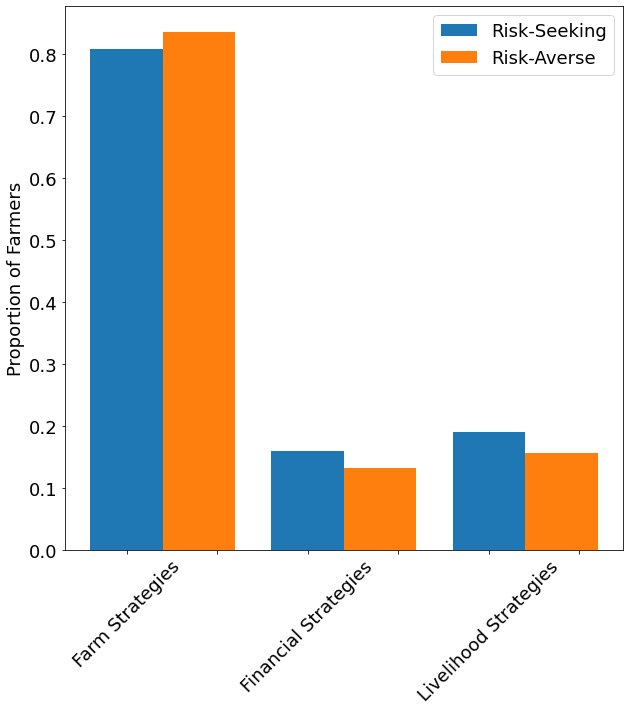

In [34]:
f, ax = plt.subplots(figsize =(10, 10))
xpos = np.arange(0,len(riskseek_adapt))
print(xpos)

ax.bar(xpos, riskseek_adapt.values(), width=0.4, label = 'Risk-Seeking')
ax.bar(xpos+0.4, riskaverse_adapt.values(), width=0.4, label='Risk-Averse')

ax.set_ylabel('Proportion of Farmers', fontsize=18)
ax.set_xticklabels(['','Farm Strategies','','Financial Strategies','', 'Livelihood Strategies'], fontsize=18, rotation=45)

plt.legend(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

# Analyzing Risk Preferences and Income Composition

In [39]:
#Reading in Income proportion data
incomes = pd.read_csv('IncomeBlocks.csv')

risk_incomes = pd.merge(incomes, riskpref, on='HHID')


count    3500.000000
mean        6.104000
std         2.944769
min         0.000000
25%         4.750000
50%         5.000000
75%        10.000000
max        10.000000
Name: RiskPref, dtype: float64

In [40]:
risk_incomes['RiskSeek'] = risk_incomes['RiskPref'] > 5

,Unnamed: 0,HHID,Year,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop,Gender,Age,Caste,RiskPref,RiskSeek
0,0,2301006,72,0.064935,0.311688,0.000000,0.311688,0.311688,0,43,1,10,True
1,500,2301006,73,0.088889,0.498413,0.000000,0.000000,0.412698,0,43,1,10,True
2,1000,2301006,74,0.000000,0.000000,0.000000,0.222222,0.777778,0,43,1,10,True
3,1500,2301006,75,0.000000,0.000000,0.000000,0.046729,0.953271,0,43,1,10,True
4,2000,2301006,76,0.000000,0.000000,0.000000,0.045872,0.954128,0,43,1,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,1499,2611119,74,0.030466,0.526523,0.430108,0.000000,0.012903,0,73,3,10,True
3496,1999,2611119,75,0.034014,0.499320,0.442177,0.000000,0.024490,0,73,3,10,True
3497,2499,2611119,76,0.077190,0.018140,0.849093,0.000000,0.055577,0,73,3,10,True
3498,2999,2611119,77,0.024375,0.017672,0.914077,0.000000,0.043876,0,73,3,10,True


In [53]:
categories = ['Farm_Prop', 'Livestock_Prop', 'Remittances_Prop', 'Off-Farm Labor_Prop', 'Other_Prop']

riskseek = {key : 0 for key in categories}
riskseek_err = {key : 0 for key in categories}
riskaverse = {key : 0 for key in categories}
riskaverse_err = {key : 0 for key in categories}

z = 1.96 #For 95% CI

for item in categories:
    riskseek[item] = risk_incomes.loc[risk_incomes['RiskSeek']==True][item].mean()
    riskseek_err[item] = z * risk_incomes.loc[risk_incomes['RiskSeek']==True][item].std() / np.sqrt(len(risk_incomes.loc[risk_incomes['RiskSeek']==True][item]))
    riskaverse[item] = risk_incomes.loc[risk_incomes['RiskSeek']==False][item].mean()
    riskaverse_err[item] = z * risk_incomes.loc[risk_incomes['RiskSeek']==False][item].std() / np.sqrt(len(risk_incomes.loc[risk_incomes['RiskSeek']==True][item]))

    


[0 1 2 3 4]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4163/2610653064.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Farming','Livestock', 'Remittances','Off-Farm Labor', 'Other'], fontsize=18, rotation=45)


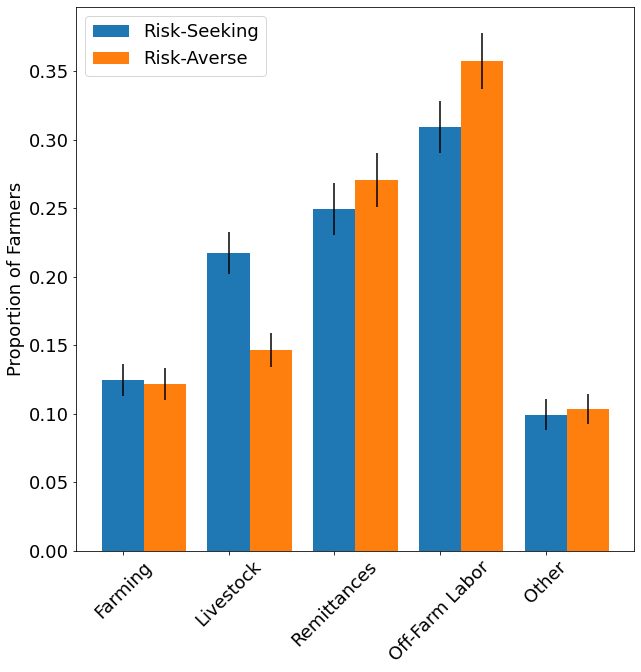

In [55]:
f, ax = plt.subplots(figsize =(10, 10))
xpos = np.arange(0,len(riskseek))
print(xpos)

ax.bar(xpos, riskseek.values(), width=0.4, yerr = riskseek_err.values(), label = 'Risk-Seeking')
ax.bar(xpos+0.4, riskaverse.values(), width=0.4, yerr = riskaverse_err.values(), label='Risk-Averse')

ax.set_ylabel('Proportion of Farmers', fontsize=18)
ax.set_xticklabels(['','Farming','Livestock', 'Remittances','Off-Farm Labor', 'Other'], fontsize=18, rotation=45)

plt.legend(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

# Econometric Analysis